# Quantitative Biology and Biophysics (AS.020.674/618)	Spring 2022
# Hilser Lab 
# March 18, 2022

#  1. Thermodynamics: 2-State Transitions

Today we’re going to explore the thermodynamic properties of a two-state equilibrium between folding states **F** and **U**.

## Libraries you will need

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## A. Define Constants

For a two-state equilibrium between folding states **F** and **U**, we need to define; 

$\Delta$H(Tm) -  the enthalpy difference between **U** and **F** at the transition temperature. <br>
Tm -  the transition temperature.<br>
$\Delta$Cp -  the heat capacity difference between **U** and **F**.

We know that $\Delta$G(T) = $\Delta$H(T) - T*$\Delta$S(T)  
Because @ Tm the $\Delta$G(Tm) = 0  we can write the expression:

$\Delta$G(Tm) = 0 = $\Delta$H(Tm) - Tm*$\Delta$S(Tm) 

which lets us calculate the entropy difference as;

$\Delta$S(Tm) = $\Delta$H(Tm)/Tm.

We know the following:

R = 1.987 <br>
Tm = 323.15 <br>
$\Delta$H(Tm) = 100000 <br>
$\Delta$Cp = 0 <br>

**Do the following:**

Calculate $\Delta$S(Tm).

## Student Input Cell

In [2]:
R = 1.987 / 1000 # I divided by 1000 because I left the unites in kcal/(mol*K) in the later questions
tm = 323.15
dH_tm = 100000
dC = 0

dS_tm = dH_tm/tm
dS_tm

309.4538140182578

## B. Define Thermodynamic Functions

From the $\Delta$H(Tm), $\Delta$S(Tm) and $\Delta$Cp, we can calcualte the enthalpy, entropy, and free energy differences at any temperature.

1. $\Delta$H(T) = $\Delta$H(Tm) + $\Delta$Cp(T - Tm)
2. $\Delta$S(T) = $\Delta$S(Tm) + $\Delta$Cp*ln(T / Tm)
3. $\Delta$G(T) = $\Delta$H(T) - T*$\Delta$S(T)

**Do the following:**

1. Plot $\Delta$H(T) and T*$\Delta$S(T) in the same plot for the temperature range: (273, 373).
2. Plot $\Delta$G(T) in a separate plot for the same temperature range.

## Student Input Cell

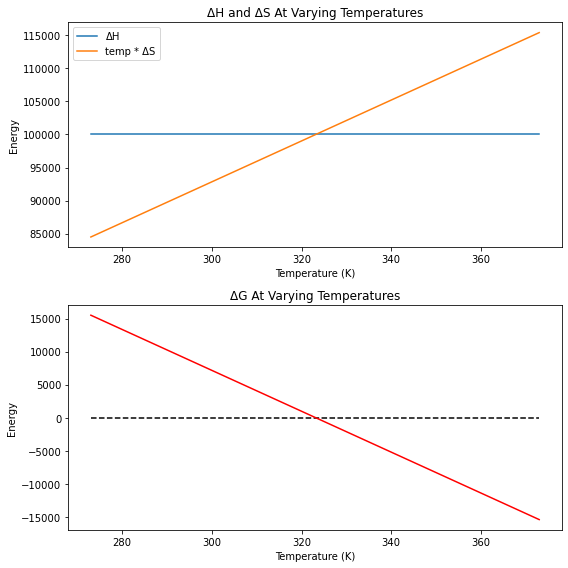

In [3]:
t_range = np.linspace(273, 373, num=100*10+1)
dH_plot = dH_tm + dC * (t_range - tm)
dS_plot = dS_tm + dC * np.log(t_range / tm)
dG_plot = dH_plot - t_range * dS_plot

fig, ax = plt.subplots(2, 1, figsize = (8,8))

ax[0].plot(t_range, dH_plot)
ax[0].plot(t_range, t_range*dS_plot)
ax[0].set_title('\u0394H and \u0394S At Varying Temperatures')
ax[0].set_xlabel('Temperature (K)')
ax[0].set_ylabel('Energy')
ax[0].legend(['\u0394H', 'temp * \u0394S'])

ax[1].plot(t_range, dG_plot, color='r')
ax[1].hlines(0, t_range[0], t_range[-1], color='k', linestyles='dashed')
ax[1].set_title('\u0394G At Varying Temperatures')
ax[1].set_xlabel('Temperature (K)')
ax[1].set_ylabel('Energy')

plt.tight_layout()
plt.show()

# C. Develop Expressions for the Statistical Weights and Probabilities

The statistical weight (which is essentially an equilibrium constant) can be determined at any temperature by the expression:

4. K = exp[-$\Delta$G / RT]

The partition function is just the sum of all the statistical weights at any temperature:

5. Q = $\Sigma$K

and the probability of any state is:

6. P = K / Q

This is shown in the table below. The free energy difference, $\Delta$Gu (Gu - Gf), allows us to determine all the expressions you require to calculate the probabilities.

<img src="http://www.gordus.org/public_images/Hilser.png" style="width: 800px;"/>

**Do the following:**

1. Define the statistical weight for both **F** and **U** states.
2. Calculate the partition function as a function of these weights.
3. Calculate the probability of being in state **F**.
4. Calculate the probability of being in state **U**.
5. Plot the **F** and **U** probabilities in the same plot for the temperature range: (273, 373).
4. Plot $\Delta$G(T) in a separate plot for the same temperature range.

## Student Input Cell

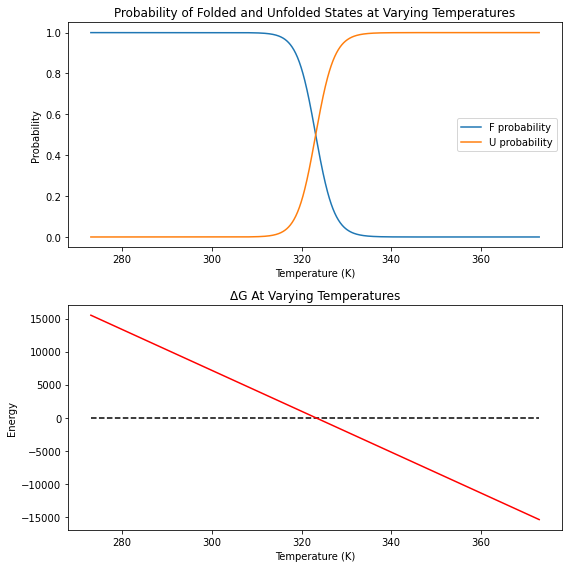

In [4]:
f_wt = 1
u_wt = np.exp(-dG_plot / (R * 1000 * t_range)) # Mult R by 1000 to put it in the right units
k_func = f_wt + u_wt

f_prob = f_wt / k_func
u_prob = u_wt / k_func

fig, ax = plt.subplots(2, 1, figsize = (8,8))

ax[0].plot(t_range, f_prob)
ax[0].plot(t_range, u_prob)
ax[0].set_title('Probability of Folded and Unfolded States at Varying Temperatures')
ax[0].set_xlabel('Temperature (K)')
ax[0].set_ylabel('Probability')
ax[0].legend(['F probability', 'U probability'])

ax[1].plot(t_range, dG_plot, color='r')
ax[1].hlines(0, t_range[0], t_range[-1], color='k', linestyles='dashed')
ax[1].set_title('\u0394G At Varying Temperatures')
ax[1].set_xlabel('Temperature (K)')
ax[1].set_ylabel('Energy')

plt.tight_layout()
plt.show()

# 2. Conformational Equilibrium (2 - State)

The goal of this section is to gain a knowledge of, and the ability to use, simulation as a tool to understand biological systems. This exercise introduces you to simulation, asking you to simulate the Gibbs energy and probabilities for a two-state transition with different parameters.

Here are some additional notes and helpful clues to moving forward. I told you in class that in order to simulate a two-state transition, you need two parameters ($\Delta$H and $\Delta$S), which are constant and therefore are the same at every temperature. **This is technically not true in most cases.** Both entropy and enthalpy are often temperature dependent, which is determined by the heat capacity difference ($\Delta$Cp), obeying the following relationships:

<img src="http://www.gordus.org/public_images/Hilser_Lab_6_1.png" />

<img src="http://www.gordus.org/public_images/Hilser_Lab_6_2.png"/>

This just means that instead of writing the Gibbs energy at any temperature (i.e., $\Delta$G(T)) in terms of two constant parameters (yellow), as we did in class and as reproduced here:

<img src="http://www.gordus.org/public_images/Hilser_Lab_6_3a.png"/>

Equation 3a becomes

<img src="http://www.gordus.org/public_images/Hilser_Lab_6_3b.png"/>

where the $\Delta$H(T) and $\Delta$S(T) vary with temperature according to eqs. 1 and 2. This means that to get an expression for the Gibbs energy at any temperature (i.e. $\Delta$G(T)) expressed in terms of constants, you just need to substitute eqs. 1 & 2 into eq. 3b and you get:

<img src="http://www.gordus.org/public_images/Hilser_Lab_6_3c.png"/>

which has four constants(yellow), the enthalpy and entropy at some reference temperature, T<sub>ref</sub> (i.e., $\Delta$H(T<sub>ref</sub>), $\Delta$S(T<sub>ref</sub>)), and $\Delta$Cp.

The next important issue, which we will discuss in a future class, regards rewriting equation 3a in terms of the transition temperature (Tm) and the enthalpy at the Tm (i.e., $\Delta$H(Tm)) instead of in terms of $\Delta$H and $\Delta$S. The reason is entirely parctical; it allows you to specify which temperature is the midpoint of the trasnistion between the two states (i.e., where $\Delta$G = 0). We can get this by noting that at the transition temperature (i.e., T = Tm), equation 3a gives:

<img src="http://www.gordus.org/public_images/Hilser_Lab_6.png"/>

which, when rearranged, yields:

<img src="http://www.gordus.org/public_images/Hilser_Lab_6_3d.png"/>

That allows us to rewrite equation 3a as:

<img src="http://www.gordus.org/public_images/Hilser_Lab_6_3e.png" />

Note, this is exactly equivalent to eq. 3a. Thus, to simulate a two-transition when $\Delta$Cp = 0, you still need just two parameters, the enthalpy difference at Tm (i.e., $\Delta$H(Tm)) and the transition temperature (Tm), both of which are constant (yellow).

In teh case when $\Delta$Cp $\neq$ 0, you need to start with eq. 3c, which after subsituting eq. 3d in place of $\Delta$S(T<sub>ref</sub>) becomes:

<img src="http://www.gordus.org/public_images/Hilser_Lab_6_4a.png" />

And upon rearranging gives:

<img src="http://www.gordus.org/public_images/Hilser_Lab_6_4b.png" />

where you can see that there are just 3 constants (yellow), and that when there is no heat capacity difference (i.e., $\Delta$Cp = 0), the second part of the equation (i.e. after the '+' sign) goes to 0, and equation 4b reduces to eq. 3e. Thus, eq. 4b is the general expression for the energy difference between two states in a two-state transition. It is the expression you will use in every simulation where the temperature dependence of a conformational transition is modeled.

## Do the following:

**1. Free Energy Simulations I (Exploring Enthalpy)**: On one graph, plot $\Delta$G vs. T (273 -> 373 K) for the following three cases:

a. Case 1: $\Delta$H = 50 kcal/mol, Tm = 50C, $\Delta$Cp = 0. <br>
b. Case 2: $\Delta$H = 100 kcal/mol, Tm = 50C, $\Delta$Cp = 0. <br>
c. Case 3: $\Delta$H = 150 kcal/mol, Tm = 50C, $\Delta$Cp = 0.

**NOTE: Tm is in Celsius, but the calculations should be in Kelvin!**

By inspecting the graph, what's the difference between these cases?

## Student Input Cell

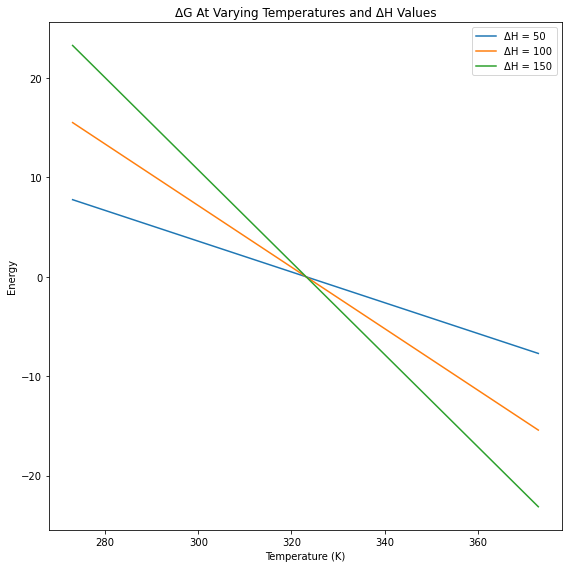

In [5]:
def dG_calc(dH, tm, dCp, temp_low=273, temp_high=373):
    T = np.linspace(temp_low, temp_high, num=(temp_high-temp_low)*10+1)
    term1 = dH * (1 - T / tm)
    term2 = dCp * (T * (1 - np.log(T / tm)) - tm)
    
    return (term1 + term2, T)

fig, ax = plt.subplots(figsize=(8,8))
cases = [50, 100, 150]
dG_case = []
for i in range(3):
    (next_dG, t_range) = dG_calc(cases[i], 50+273.15, 0)
    dG_case.append(next_dG)
    ax.plot(t_range, dG_case[i])

ax.set_title('\u0394G At Varying Temperatures and \u0394H Values')
ax.legend(['\u0394H = 50', '\u0394H = 100', '\u0394H = 150'])
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Energy')
plt.tight_layout()

plt.show()

**Response to question:** The difference in the free energy of these cases is the slope of the graphs. All three intersect at the Tm, where deltaG is zero, but the greater deltaH, the greater the decrease in deltaG with increasing temperature.

**2. Population Simulations I:**
For a 2-state transition, write the expression for the statistical weights and the partition function.

a. For each case from Question 1, make a plot of probability of the folded and unfolded states vs. T(273 -> 373 K). <br>
b. On one graph, plot the folded probability vs. T for each case. What do you observe?

## Student Input Cell

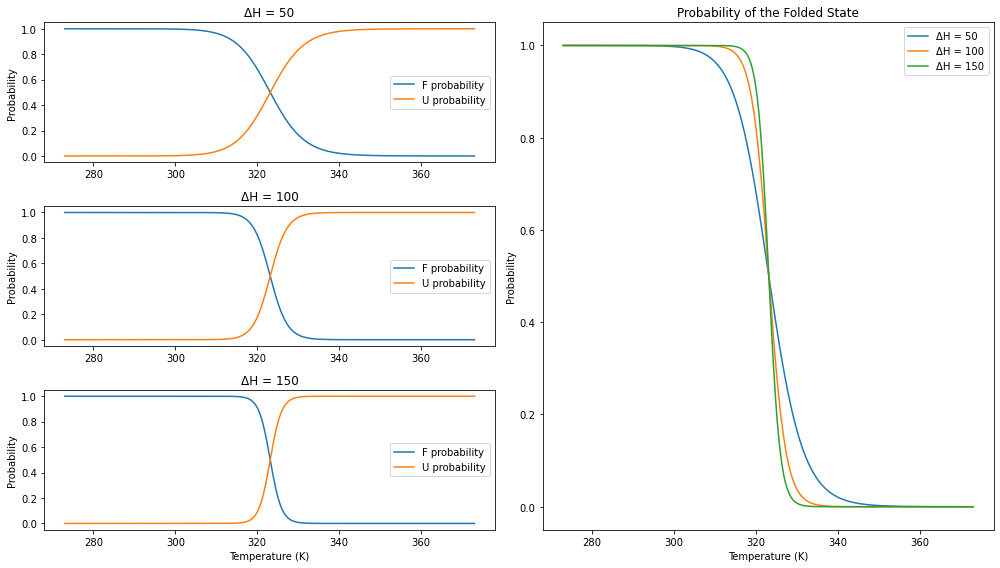

In [6]:
def prob_calc(dG, temp_low=273, temp_high=373):
    T = np.linspace(temp_low, temp_high, num=(temp_high-temp_low)*10+1)
    f_wt = 1
    u_wt = np.exp(-dG / (R * t_range))
    k_func = f_wt + u_wt

    f_prob = f_wt / k_func
    u_prob = u_wt / k_func
    
    return (f_prob, u_prob, T)

fig = plt.figure(figsize=(14,8))
sub1 = fig.add_subplot(3,2,1)
sub2 = fig.add_subplot(3,2,3)
sub3 = fig.add_subplot(3,2,5)
sub4 = fig.add_subplot(1,2,2)
ax = [sub1, sub2, sub3, sub4]
f_probs = []
u_probs = []
for i in range(3):
    (f, u, t_range) = prob_calc(dG_case[i])
    ax[i].plot(t_range, f, t_range, u)
    ax[i].set_title('\u0394H = ' + str(cases[i]))
    ax[i].set_ylabel('Probability')
    ax[i].legend(['F probability', 'U probability'])
    ax[3].plot(t_range, f)

ax[2].set_xlabel('Temperature (K)')
ax[3].set_title('Probability of the Folded State')
ax[3].set_xlabel('Temperature (K)')
ax[3].set_ylabel('Probability')
ax[3].legend(['\u0394H = 50', '\u0394H = 100', '\u0394H = 150'])
plt.tight_layout()

plt.show()

**Response to question:** The above graphs demonstrate that increasing deltaH increases the sensitivity of the protein folding state to temperature. The probability of finding the protein in the folded state decreases more rapidly with temperature for higher deltaH values. However, the Tm has clearly not changed, as \[F\] = \[U\] at the same temperature for all three conditions.

**3. Free Energy Simulations II (Exploring Heat Capacity)**: On one graph plot $\Delta$G vs. T (in Kelvin) for the following three cases:

a. Case 1: $\Delta$H = 100 kcal/mol, Tm = 50C, $\Delta$Cp = 0 cal/(mol * K). <br>
b. Case 2: $\Delta$H = 100 kcal/mol, Tm = 50C, $\Delta$Cp = 1500 cal/(mol * K). <br>
c. Case 3: $\Delta$H = 100 kcal/mol, Tm = 50C, $\Delta$Cp = 3000 cal/(mol * K). <br>

By inspecting the graph, what is the difference between these cases?

## Student Input Cell

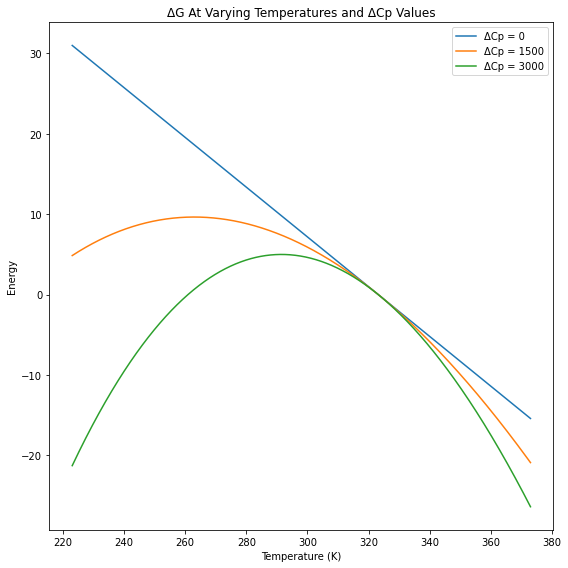

In [7]:
fig, ax = plt.subplots(figsize=(8,8))
cases = [0, 1500/1000, 3000/1000]
dG_case = []
for i in range(3):
    (next_dG, t_range) = dG_calc(100, 50+273.15, cases[i], 223, 373)
    dG_case.append(next_dG)
    ax.plot(t_range, dG_case[i])

ax.set_title('\u0394G At Varying Temperatures and \u0394Cp Values')
ax.legend(['\u0394Cp = 0', '\u0394Cp = 1500', '\u0394Cp = 3000'])
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Energy')
plt.tight_layout()

plt.show()

**Response to question**: This graph suggests that changing deltaCp causes a change in the rate at which deltaG changes relative to temperature. Increasing deltaCp causes the rate of change of deltaG to decrease more rapidly with increasing temperature. All three cases still tangentially intersect at Tm where deltaG is zero.

**4. Population Simulations**:

a. For each case from Question 3, make a plot of probability of the folded and unfolded states vs. T (between -50 and 100 C, but remember to use Kelvin!). <br>
b. One one graph, plot the **unfolded** probability vs. T for each case. <br>

What do you observe? How do you interpret it?

## Student Input Cell

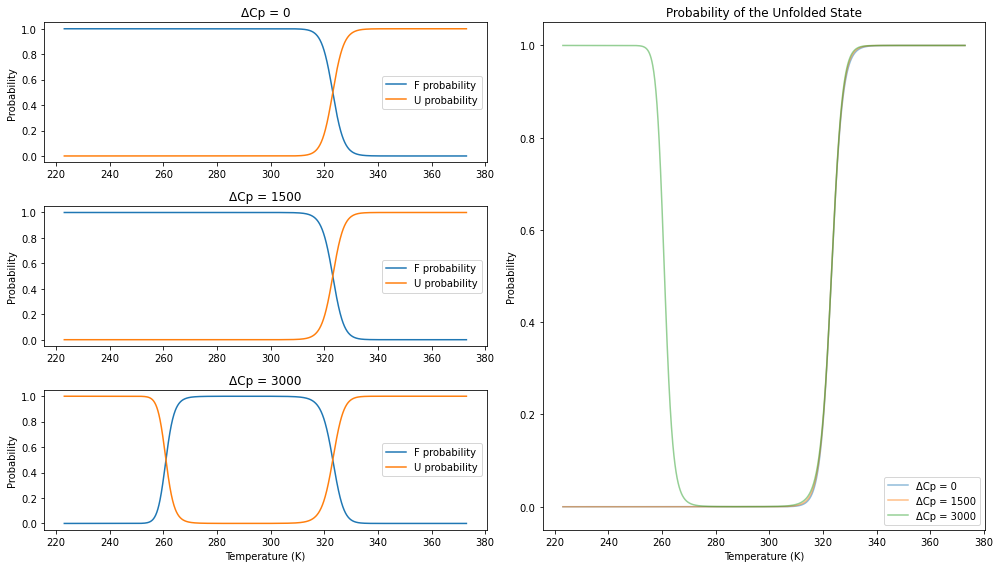

In [8]:
fig = plt.figure(figsize=(14,8))
sub1 = fig.add_subplot(3,2,1)
sub2 = fig.add_subplot(3,2,3)
sub3 = fig.add_subplot(3,2,5)
sub4 = fig.add_subplot(1,2,2)
ax = [sub1, sub2, sub3, sub4]
f_probs = []
u_probs = []
for i in range(3):
    (f, u, t_range) = prob_calc(dG_case[i], 223, 373)
    ax[i].plot(t_range, f, t_range, u)
    ax[i].set_title('\u0394Cp = ' + str(int(cases[i]*1000)))
    ax[i].set_ylabel('Probability')
    ax[i].legend(['F probability', 'U probability'])
    ax[3].plot(t_range, u, alpha=0.5)

ax[2].set_xlabel('Temperature (K)')
ax[3].set_title('Probability of the Unfolded State')
ax[3].set_xlabel('Temperature (K)')
ax[3].set_ylabel('Probability')
ax[3].legend(['\u0394Cp = 0', '\u0394Cp = 1500', '\u0394Cp = 3000'])    
plt.tight_layout()

plt.show()

**Response to question:** These graphs show that sufficiently increasing deltaCp causes the protein to experience susceptibility to colder temperatures. At deltaCp = 3000 cal/(mol * K), the unfolded state is favored below about 260 degrees K, so this creates an "optimal temperature range" between 260 and 323 degrees where the folded state can dominate.